In [463]:
# uncomment if needed
# %pip install scikit-learn
# %pip install transformers
# %pip install matplotlib
# %pip install seaborn
# %pip install PySastrawi
# %pip install keras

In [464]:
import pandas as pd
import re

In [465]:
df = pd.read_json('main.json')
df.head()

,title,label,label_score
0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",non-clickbait,0
1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,non-clickbait,0
2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1
3,"Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...",non-clickbait,0
4,"Terkait Mayat Bayi Mengenaskan di Tangerang, S...",non-clickbait,0


<Axes: ylabel='count'>

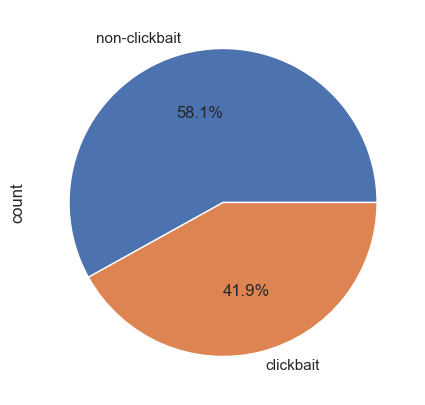

In [466]:
from matplotlib import pyplot as plt
import seaborn as sns

# pie plot with sns
plt.figure(figsize=(5, 5))
sns.set_theme()
df['label'].value_counts().plot.pie(autopct='%1.1f%%')

In [467]:
df_clickbait = df[df['label'] == 'clickbait']
df_non_clickbait = df[df['label'] == 'non-clickbait']

# Undersample the majority class
undersampled_non_clickbait = df_non_clickbait.sample(n=len(df_clickbait), random_state=3006)

# Combine the undersampled majority class with the minority class
balanced_df = pd.concat([undersampled_non_clickbait, df_clickbait], ignore_index=True)

# Check the class balance
balanced_df['label'].value_counts()

label
non-clickbait    6290
clickbait        6290
Name: count, dtype: int64

In [468]:
df = balanced_df

<Axes: ylabel='count'>

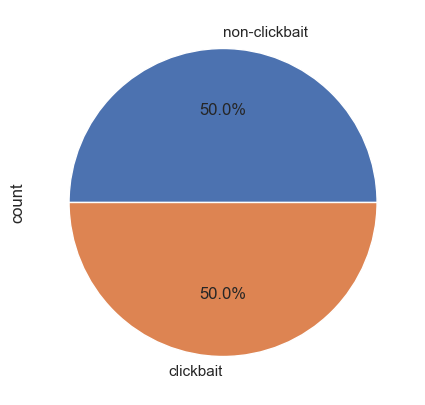

In [469]:
plt.figure(figsize=(5, 5))
sns.set_theme()
df['label'].value_counts().plot.pie(autopct='%1.1f%%')

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12580 entries, 0 to 12579
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        12580 non-null  object
 1   label        12580 non-null  object
 2   label_score  12580 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 295.0+ KB


In [471]:
df.isnull().sum()

title          0
label          0
label_score    0
dtype: int64

In [472]:
from nltk.tokenize import word_tokenize
# tf idf
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [473]:
angka = ['nol', 'satu', 'dua', 'tiga', 'empat', 'lima', 'enam', 'tujuh', 'delapan', 'sembilan']

def check_features(text):
    result = []
    # check if the text contains exclamation mark
    result.append(1 if '!' in text else 0)
    # check if the text contains question mark
    result.append(1 if '?' in text else 0)
    # check if the text contains multiple exclamation marks
    result.append(1 if '!!' in text else 0)
    # check if the text contains digit
    result.append(1 if any(char.isdigit() for char in text) else 0)
    # check if the text contains numbers
    result.append(1 if any(word.lower() in angka for word in text.split()) else 0)
    return result

df['features'] = df['title'].apply(check_features)

In [474]:
def preprocess_text(text):
    # remove non-alphabet characters except exclamations and question marks and keep numbers
    text = re.sub(r'[^A-Za-z0-9?!]', ' ', text)
    # remove whitespace
    text = text.strip()
    # remove newline
    text = text.replace('\n', ' ')
    # remove extra space
    text = re.sub(' +', ' ', text)
    # lowercase
    text = text.lower()
    # tokenize
    text = word_tokenize(text)
    result = text;
    return result

In [475]:
df['preprocessed_text'] = df['title'].apply(preprocess_text)
df['stemmed_text'] = df['preprocessed_text'].apply(lambda x: [stemmer.stem(word) for word in x]);

In [476]:
# calculate how many empty word in all stemmed accross all data
empty_word = 0
for i in range(len(df)):
    empty_word += df['stemmed_text'].iloc[i].count('')
print(empty_word)


1009


In [477]:
# remove empty word
df['stemmed_text'] = df['stemmed_text'].apply(lambda x: [word for word in x if word != ''])

In [478]:
df.head(10)

,title,label,label_score,features,preprocessed_text,stemmed_text
0,Puluhan Orang Tua Bersihkan Gedung Bekas Menam...,non-clickbait,0,"[0, 0, 0, 0, 0]","[puluhan, orang, tua, bersihkan, gedung, bekas...","[puluh, orang, tua, sih, gedung, bekas, tampun..."
1,"Temu Nasional MPZ, Bangun Zakat Profesional Hi...",non-clickbait,0,"[0, 0, 0, 0, 0]","[temu, nasional, mpz, bangun, zakat, profesion...","[temu, nasional, mpz, bangun, zakat, profesion..."
2,"Duel Berdarah Tidak Distop, Tyson Fury Diuntun...",non-clickbait,0,"[0, 0, 0, 0, 0]","[duel, berdarah, tidak, distop, tyson, fury, d...","[duel, darah, tidak, stop, tyson, fury, untung..."
3,"Hanya Lima Tahun, Waskita Toll Road Saingi Jas...",non-clickbait,0,"[0, 0, 0, 0, 1]","[hanya, lima, tahun, waskita, toll, road, sain...","[hanya, lima, tahun, waskita, toll, road, sain..."
4,Essential Oil Terbaik untuk Deodoran Alami,non-clickbait,0,"[0, 0, 0, 0, 0]","[essential, oil, terbaik, untuk, deodoran, alami]","[essential, oil, baik, untuk, deodoran, alami]"
5,"BPK Serahkan IHPS I 2019, Jokowi: Akan Kita Ti...",non-clickbait,0,"[0, 0, 0, 1, 0]","[bpk, serahkan, ihps, i, 2019, jokowi, akan, k...","[bpk, serah, ihps, i, 2019, jokowi, akan, kita..."
6,"Maskapai Terjun ke Bisnis Kurir, Jasa Pengirim...",non-clickbait,0,"[0, 0, 0, 0, 0]","[maskapai, terjun, ke, bisnis, kurir, jasa, pe...","[maskapai, terjun, ke, bisnis, kurir, jasa, ki..."
7,"Spesifikasi Rinci OnePlus 7T, 7T Pro dan Tangg...",non-clickbait,0,"[0, 0, 0, 1, 0]","[spesifikasi, rinci, oneplus, 7t, 7t, pro, dan...","[spesifikasi, rinci, oneplus, 7t, 7t, pro, dan..."
8,"Tumbuhkan Minat Baca, Pembalap Kezia Santoso D...",non-clickbait,0,"[0, 0, 0, 0, 0]","[tumbuhkan, minat, baca, pembalap, kezia, sant...","[tumbuh, minat, baca, balap, kezia, santoso, d..."
9,Sinopsis Sinetron 'CINTA SUCI' Episode 318 & 3...,non-clickbait,0,"[0, 0, 0, 1, 0]","[sinopsis, sinetron, cinta, suci, episode, 318...","[sinopsis, sinetron, cinta, suci, episode, 318..."


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12580 entries, 0 to 12579
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              12580 non-null  object
 1   label              12580 non-null  object
 2   label_score        12580 non-null  int64 
 3   features           12580 non-null  object
 4   preprocessed_text  12580 non-null  object
 5   stemmed_text       12580 non-null  object
dtypes: int64(1), object(5)
memory usage: 589.8+ KB


In [480]:
vocab = {}
for text in df['stemmed_text']:
    for word in text:
        if word not in vocab:
            # Initialize frequency to 1 if the word is encountered for the first time
            vocab[word] = {'index': len(vocab) + 1000, 'frequency': 1}
        else:
            # Increment frequency if the word is already in the vocab
            vocab[word]['frequency'] += 1

# Calculate the total number of unique words in the vocabulary
len(vocab)


12432

In [481]:
# Printing the first 10 rows of the vocab dictionary
count = 0
for word, properties in vocab.items():
    print(f"Word: {word}, Index: {properties['index']}, Frequency: {properties['frequency']}")
    count += 1
    if count >= 10:
        break


Word: puluh, Index: 1000, Frequency: 34
Word: orang, Index: 1001, Frequency: 269
Word: tua, Index: 1002, Frequency: 37
Word: sih, Index: 1003, Frequency: 11
Word: gedung, Index: 1004, Frequency: 32
Word: bekas, Index: 1005, Frequency: 76
Word: tampung, Index: 1006, Frequency: 6
Word: cari, Index: 1007, Frequency: 66
Word: suaka, Index: 1008, Frequency: 12
Word: temu, Index: 1009, Frequency: 216


In [482]:
df['vectorized'] = df['stemmed_text'].apply(lambda x: [vocab[word]['index'] for word in x])
df.head()

,title,label,label_score,features,preprocessed_text,stemmed_text,vectorized
0,Puluhan Orang Tua Bersihkan Gedung Bekas Menam...,non-clickbait,0,"[0, 0, 0, 0, 0]","[puluhan, orang, tua, bersihkan, gedung, bekas...","[puluh, orang, tua, sih, gedung, bekas, tampun...","[1000, 1001, 1002, 1003, 1004, 1005, 1006, 100..."
1,"Temu Nasional MPZ, Bangun Zakat Profesional Hi...",non-clickbait,0,"[0, 0, 0, 0, 0]","[temu, nasional, mpz, bangun, zakat, profesion...","[temu, nasional, mpz, bangun, zakat, profesion...","[1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016]"
2,"Duel Berdarah Tidak Distop, Tyson Fury Diuntun...",non-clickbait,0,"[0, 0, 0, 0, 0]","[duel, berdarah, tidak, distop, tyson, fury, d...","[duel, darah, tidak, stop, tyson, fury, untung...","[1017, 1018, 1019, 1020, 1021, 1022, 1023, 102..."
3,"Hanya Lima Tahun, Waskita Toll Road Saingi Jas...",non-clickbait,0,"[0, 0, 0, 0, 1]","[hanya, lima, tahun, waskita, toll, road, sain...","[hanya, lima, tahun, waskita, toll, road, sain...","[1026, 1027, 1028, 1029, 1030, 1031, 1032, 103..."
4,Essential Oil Terbaik untuk Deodoran Alami,non-clickbait,0,"[0, 0, 0, 0, 0]","[essential, oil, terbaik, untuk, deodoran, alami]","[essential, oil, baik, untuk, deodoran, alami]","[1035, 1036, 1037, 1038, 1039, 1040]"


In [483]:
# get max length of text
max_length = df['vectorized'].apply(len).max()
print(max_length)

20


In [484]:
# padding
padding = 27
df['padded'] = df['vectorized'].apply(lambda x: x + [-1] * (padding - len(x)))
df.head()

,title,label,label_score,features,preprocessed_text,stemmed_text,vectorized,padded
0,Puluhan Orang Tua Bersihkan Gedung Bekas Menam...,non-clickbait,0,"[0, 0, 0, 0, 0]","[puluhan, orang, tua, bersihkan, gedung, bekas...","[puluh, orang, tua, sih, gedung, bekas, tampun...","[1000, 1001, 1002, 1003, 1004, 1005, 1006, 100...","[1000, 1001, 1002, 1003, 1004, 1005, 1006, 100..."
1,"Temu Nasional MPZ, Bangun Zakat Profesional Hi...",non-clickbait,0,"[0, 0, 0, 0, 0]","[temu, nasional, mpz, bangun, zakat, profesion...","[temu, nasional, mpz, bangun, zakat, profesion...","[1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016]","[1009, 1010, 1011, 1012, 1013, 1014, 1015, 101..."
2,"Duel Berdarah Tidak Distop, Tyson Fury Diuntun...",non-clickbait,0,"[0, 0, 0, 0, 0]","[duel, berdarah, tidak, distop, tyson, fury, d...","[duel, darah, tidak, stop, tyson, fury, untung...","[1017, 1018, 1019, 1020, 1021, 1022, 1023, 102...","[1017, 1018, 1019, 1020, 1021, 1022, 1023, 102..."
3,"Hanya Lima Tahun, Waskita Toll Road Saingi Jas...",non-clickbait,0,"[0, 0, 0, 0, 1]","[hanya, lima, tahun, waskita, toll, road, sain...","[hanya, lima, tahun, waskita, toll, road, sain...","[1026, 1027, 1028, 1029, 1030, 1031, 1032, 103...","[1026, 1027, 1028, 1029, 1030, 1031, 1032, 103..."
4,Essential Oil Terbaik untuk Deodoran Alami,non-clickbait,0,"[0, 0, 0, 0, 0]","[essential, oil, terbaik, untuk, deodoran, alami]","[essential, oil, baik, untuk, deodoran, alami]","[1035, 1036, 1037, 1038, 1039, 1040]","[1035, 1036, 1037, 1038, 1039, 1040, -1, -1, -..."


In [485]:
# add features to the first index of the padded text
df['padded'] = df.apply(lambda x: x['features'] + x['padded'], axis=1)
df.head()

,title,label,label_score,features,preprocessed_text,stemmed_text,vectorized,padded
0,Puluhan Orang Tua Bersihkan Gedung Bekas Menam...,non-clickbait,0,"[0, 0, 0, 0, 0]","[puluhan, orang, tua, bersihkan, gedung, bekas...","[puluh, orang, tua, sih, gedung, bekas, tampun...","[1000, 1001, 1002, 1003, 1004, 1005, 1006, 100...","[0, 0, 0, 0, 0, 1000, 1001, 1002, 1003, 1004, ..."
1,"Temu Nasional MPZ, Bangun Zakat Profesional Hi...",non-clickbait,0,"[0, 0, 0, 0, 0]","[temu, nasional, mpz, bangun, zakat, profesion...","[temu, nasional, mpz, bangun, zakat, profesion...","[1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016]","[0, 0, 0, 0, 0, 1009, 1010, 1011, 1012, 1013, ..."
2,"Duel Berdarah Tidak Distop, Tyson Fury Diuntun...",non-clickbait,0,"[0, 0, 0, 0, 0]","[duel, berdarah, tidak, distop, tyson, fury, d...","[duel, darah, tidak, stop, tyson, fury, untung...","[1017, 1018, 1019, 1020, 1021, 1022, 1023, 102...","[0, 0, 0, 0, 0, 1017, 1018, 1019, 1020, 1021, ..."
3,"Hanya Lima Tahun, Waskita Toll Road Saingi Jas...",non-clickbait,0,"[0, 0, 0, 0, 1]","[hanya, lima, tahun, waskita, toll, road, sain...","[hanya, lima, tahun, waskita, toll, road, sain...","[1026, 1027, 1028, 1029, 1030, 1031, 1032, 103...","[0, 0, 0, 0, 1, 1026, 1027, 1028, 1029, 1030, ..."
4,Essential Oil Terbaik untuk Deodoran Alami,non-clickbait,0,"[0, 0, 0, 0, 0]","[essential, oil, terbaik, untuk, deodoran, alami]","[essential, oil, baik, untuk, deodoran, alami]","[1035, 1036, 1037, 1038, 1039, 1040]","[0, 0, 0, 0, 0, 1035, 1036, 1037, 1038, 1039, ..."


In [486]:
# make sure all padded text has the same length
df['padded'].apply(len).value_counts()

padded
32    12580
Name: count, dtype: int64

In [487]:
# convert padded text to numpy array
X = df['padded'].to_numpy()
y = df['label_score']
X = X.tolist()
print(X)

[[0, 0, 0, 0, 0, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, 0, 0, 0, 0, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, 0, 0, 0, 0, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, 0, 0, 0, 1, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, 0, 0, 0, 0, 1035, 1036, 1037, 1038, 1039, 1040, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, 0, 0, 1, 0, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, 0, 0, 0, 0, 1051, 1052, 1053, 1054, 1055, 1033, 1056, 1057, 1058, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [0, 

In [488]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1453)

In [489]:
from sklearn.ensemble._gb import GradientBoostingClassifier

model = GradientBoostingClassifier(max_depth=12, n_estimators=500, random_state=3006, max_features='sqrt')

In [490]:
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=12, max_features='sqrt', n_estimators=500,
                           random_state=3006)

In [491]:
y_pred = model.predict(X_test)

In [492]:
print(y_pred[:10])

[1 0 1 0 0 0 0 1 1 0]


In [493]:
from sklearn.metrics import classification_report, accuracy_score

# evaluate
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1290
           1       0.89      0.72      0.79      1226

    accuracy                           0.82      2516
   macro avg       0.83      0.82      0.82      2516
weighted avg       0.83      0.82      0.82      2516

0.8179650238473768
